# Calculating Prediction Intervals for a Linear Regression Model
*Based on https://machinelearningmastery.com/prediction-intervals-for-machine-learning/*

In [1]:
import numpy as np

In [3]:
# Fix the random seed for demonstration purposes.
np.random.seed(1)

In [4]:
# Generate x and y with a Gaussian distribution.
x = 20 * np.random.randn(1000) + 100
y = x + (10 * np.random.randn(1000) + 50)

In [5]:
# Print summary statistics for x and y.
print('x: mean=%.3f stdv=%.3f' % (np.mean(x), np.std(x)))
print('y: mean=%.3f stdv=%.3f' % (np.mean(y), np.std(y)))

x: mean=100.776 stdv=19.620
y: mean=151.050 stdv=22.358


In [13]:
from scipy import stats

In [14]:
# Fit linear regtression model
b1, b0, r_value, p_value, std_err = stats.linregress(x,y)

In [15]:
# Perform prediction
yhat = b0 + b1 * x

In [17]:
import matplotlib.pyplot as plt

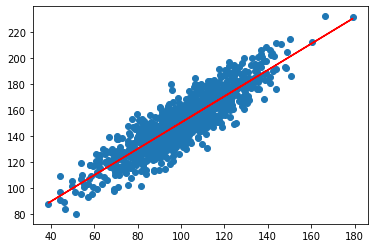

In [18]:
# Plot data and predicted model.
plt.scatter(x, y)
plt.plot(x, yhat, color='r')
plt.show()

In [19]:
x_in = x[0]
# Real y
y_out = y[0]
# Predicted y
yhat_out = yhat[0]

Calculate the standard deviation of the prediction against the real value.

$sum\_errors = \sum^{i=0}_{N}{(y_i - \hat{y}_i)^2}$

$stdev = \sqrt{\frac{1}{N-2} * sum\_errors}$

In [21]:
sum_errs = sum((y-yhat)**2)

In [22]:
stdev = np.sqrt(1/(len(y)-2) * sum_errs)

In [26]:
# Calculate the prediction interval for a linear regression
interval = 1.96 * stdev

A prediction interval can be modeled as follows:

$\hat{y} \pm z * \sigma$

Where $z$ is the number of standard deviations from the **asummed** Gaussian normal distribution of x and y in linear regression. This determines the value of your prediction interval i.e.*

- median -> $\pm 0$ standard deviations
The intuition behind the median is that it splits the population evenly into two parts. As such, the z-score at 0 marks this point.
- 50% -> $\pm 0.675$ standard deviations
- 67% -> $\pm 1$ standard deviations
- 95% -> $\pm 1.96$ standard deviations
- 99% -> $\pm 2.326$ standard deviations

**\* Approximate z-scores**

It is better to calculate the quartiles of the underlying distribution. In this case, this is a normal gaussian distribution, so these common values can be used.

In [27]:
lower, upper = y_out - interval, y_out + interval

In [28]:
print("Prediction Interval: %.3f" % interval)

Prediction Interval: 20.204


In [32]:
print('95%% Confidence Interval: %.3f to %.3f' % (lower, upper))

95% Confidence Interval: 160.750 to 201.159


In [33]:
print("True Value: %.3f" % yhat_out)

True Value: 183.124


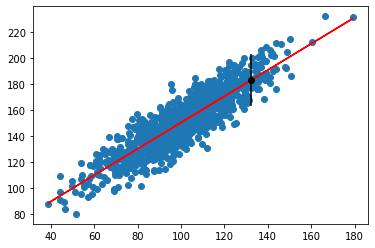

In [35]:
# Plot the prediction interval
plt.scatter(x, y)
plt.plot(x, yhat, color='r')
plt.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
plt.show()